In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import time
from datetime import date, datetime, timedelta

import random
import math

from typing import Dict, List, Tuple
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Commercial_Vehicle_Orders_Synthetic_Dataset.csv', keep_default_na=False)
df

,order_id,order_date,customer_id,product_id,quantity,product_category,vehicle_model,vehicle_class,configuration,color,...,season,is_holiday_period,demand_factor,promo_available,promo_category,promo_value_discount,promo_value_rebate_usd,promo_applied,storage_holding_cost_usd,late_delivery_penalty_usd
0,CV-2023-045821,2023-06-01,CUST-10012,BS26656,5,Bus,Transit Bus 40ft,City Bus,"Low Floor, Diesel, 280HP",Green,...,Summer,False,1.3,False,N/A,0.00,0,N/A,0.000000,0.0
1,CV-2023-045821,2023-06-01,CUST-10012,BS22492,5,Bus,Transit Bus 40ft,City Bus,"Low Floor, Diesel, 280HP",Black,...,Summer,False,1.3,False,N/A,0.00,0,N/A,0.000000,0.0
2,CV-2023-045822,2023-06-01,CUST-10012,TR79562,1,Truck,eCascadia,Class 8 Truck,"Electric, Day Cab, 470HP",Green,...,Summer,False,1.0,True,Volume,1.72,2000,True,2205.584597,0.0
3,CV-2023-045823,2023-06-01,CUST-10017,BS27669,5,Bus,School Bus C2,School Bus,"Type C, Diesel, 240HP",Red,...,Summer,False,1.3,False,N/A,0.00,0,N/A,790.343818,0.0
4,CV-2023-045824,2023-06-01,CUST-10017,BS25918,20,Bus,Transit Bus 60ft,City Bus,"Articulated, Hybrid, 330HP",Black,...,Summer,False,1.3,False,N/A,0.00,0,N/A,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60152,CV-2025-083337,2025-05-30,CUST-10049,PT66084,1,Powertrain,DD15 Engine,Heavy Duty Engine,"14.8L, 505HP, EPA 2021",Blue,...,Spring,False,1.2,False,N/A,0.00,0,N/A,0.000000,0.0
60153,CV-2025-083337,2025-05-30,CUST-10049,TR78241,1,Truck,LT Series,Class 7 Truck,"Extended Cab, Auto Trans, 360HP",White,...,Spring,False,1.2,True,Federal Holiday,3.55,0,False,0.000000,0.0
60154,CV-2025-083337,2025-05-30,CUST-10049,TR78739,1,Truck,Cascadia DD15,Class 8 Truck,"Sleeper Cab, Auto Trans, 455HP",Black,...,Spring,False,1.2,False,N/A,0.00,0,N/A,0.000000,0.0
60155,CV-2025-083338,2025-05-30,CUST-10014,BS22599,5,Bus,Transit Bus 40ft,City Bus,"Low Floor, Diesel, 280HP",Black,...,Spring,False,1.2,False,N/A,0.00,0,N/A,0.000000,0.0


In [3]:
for column in df.columns: 
    print (column)

order_id
order_date
customer_id
product_id
quantity
product_category
vehicle_model
vehicle_class
configuration
color
condition
age
miles_driven
base_price
current_price
order_value_usd
base_price_usd
options_value_usd
material_cost_usd
labor_cost_usd
shipping_cost_usd
overhead_cost_usd
rush_order_premium_usd
discount
rebate_usd
profit_margin_percent
payment_terms
payment_terms_days
customer_credit_rating
currency
customer_name
customer_type
customer_tier
customer_region
fleet_size
previous_orders_count
customer_satisfaction
sales_channel
customer_revenue_ytd
order_status
cancel_reason
order_priority
requested_delivery_date
planned_delivery_date
actual_delivery_date
cancellation_date
cycle_time_days
on_promise_delivery
delivery_region
delivery_distance
delivery_method
production_plant
production_line
planned_production_start_date
actual_production_start_date
planned_production_end_date
actual_production_end_date
build_complexity
production_capacity_used
capacity_available_percent
labor_

In [4]:
# Date columns parsing
date_columns = []

for column in df.columns: 
    if "_date" in column.lower(): 
        try: 
            df[column] = pd.to_datetime(df[column], format='mixed')
            date_columns.append(column)
        except: 
            pass 
        
date_columns

['order_date',
 'requested_delivery_date',
 'planned_delivery_date',
 'actual_delivery_date',
 'cancellation_date',
 'planned_production_start_date',
 'actual_production_start_date',
 'planned_production_end_date',
 'actual_production_end_date',
 'engineering_approval_date',
 'constraint_start_date',
 'expected_resolution_date']

In [5]:
main_date_column = 'order_date'
main_date_column

'order_date'

In [6]:
# ID columns parsing
id_columns = []
for column in df.columns: 
    if "_id" in column.lower(): 
        id_columns.append(column)
for column in id_columns:
    df[column] = df[column].astype('object')
    
id_columns

['order_id', 'customer_id', 'product_id']

# Prompts 1-4 (Simple Pandas Queries)

In [7]:
current_date = date.today()
current_month = current_date.month
current_year = current_date.year
print (current_month, current_year)
if current_month >= 10: 
    current_period = str(current_year) + str('-') + str(current_month)
else: 
    current_period = str(current_year) + str('-0') + str(current_month)
print (current_period)

6 2025
2025-06


## Prompt 1

In [8]:
# Orders placed in current month
print(f"\nPROMPT 1: Please help identify the orders for this month.")
current_month_orders = df[df['order_date'].dt.strftime('%Y-%m') == current_period]

# Summary statistics
unique_orders = current_month_orders['order_id'].nunique()    # Number of orders placed
total_line_items = len(current_month_orders)    # Number of rows (each row is one product in an order)
total_units = current_month_orders['quantity'].sum()    # Total units ordered
total_value = current_month_orders['order_value_usd'].sum()

print(f"\nOrders for {current_date.strftime('%B %Y')}")
print("-"*40)
print(f"• Unique Orders: {unique_orders:,}")
print(f"• Total Line Items: {total_line_items:,}")
print(f"• Total Units Ordered: {total_units:,}")  
print(f"• Total Order Value: ${total_value:,.2f}")
print(f"\nBreakdown by Product Category:")
print(current_month_orders['product_category'].value_counts())
print(f"\nBreakdown by Customer Type:")
print(current_month_orders['customer_type'].value_counts())


PROMPT 1: Please help identify the orders for this month.

Orders for June 2025
----------------------------------------
• Unique Orders: 0
• Total Line Items: 0
• Total Units Ordered: 0
• Total Order Value: $0.00

Breakdown by Product Category:
Series([], Name: count, dtype: int64)

Breakdown by Customer Type:
Series([], Name: count, dtype: int64)


In [9]:
# Verifying the above
current_month_orders = df[df['order_date'].dt.to_period('M')=='2025-05'].copy().reset_index(drop=True)
current_month_orders

,order_id,order_date,customer_id,product_id,quantity,product_category,vehicle_model,vehicle_class,configuration,color,...,season,is_holiday_period,demand_factor,promo_available,promo_category,promo_value_discount,promo_value_rebate_usd,promo_applied,storage_holding_cost_usd,late_delivery_penalty_usd
0,CV-2025-082193,2025-05-05,CUST-10046,TR74357,1,Truck,Western Star 57X,Class 8 Truck,"Sleeper Cab, Manual Trans, 505HP",Blue,...,Spring,False,1.2,False,N/A,0.00,0,N/A,0.0,0.0
1,CV-2025-082194,2025-05-05,CUST-10069,PT60876,1,Powertrain,DD15 Engine,Heavy Duty Engine,"14.8L, 505HP, EPA 2021",Yellow,...,Spring,False,1.2,False,N/A,0.00,0,N/A,0.0,0.0
2,CV-2025-082194,2025-05-05,CUST-10069,BS21031,1,Bus,Coach Bus J4500,Coach Bus,"Luxury, Diesel, 450HP",Silver,...,Spring,False,1.2,True,Summer Special,3.36,3000,True,0.0,0.0
3,CV-2025-082194,2025-05-05,CUST-10069,PT69511,1,Powertrain,DT12 Transmission,Automated Manual,"12-Speed, Direct Drive",Green,...,Spring,False,1.2,False,N/A,0.00,0,N/A,0.0,0.0
4,CV-2025-082195,2025-05-05,CUST-10029,PT67460,1,Powertrain,X15 Engine,Heavy Duty Engine,"15L, 605HP, EPA 2021",Yellow,...,Spring,False,1.2,False,N/A,0.00,0,N/A,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,CV-2025-083337,2025-05-30,CUST-10049,PT66084,1,Powertrain,DD15 Engine,Heavy Duty Engine,"14.8L, 505HP, EPA 2021",Blue,...,Spring,False,1.2,False,N/A,0.00,0,N/A,0.0,0.0
1836,CV-2025-083337,2025-05-30,CUST-10049,TR78241,1,Truck,LT Series,Class 7 Truck,"Extended Cab, Auto Trans, 360HP",White,...,Spring,False,1.2,True,Federal Holiday,3.55,0,False,0.0,0.0
1837,CV-2025-083337,2025-05-30,CUST-10049,TR78739,1,Truck,Cascadia DD15,Class 8 Truck,"Sleeper Cab, Auto Trans, 455HP",Black,...,Spring,False,1.2,False,N/A,0.00,0,N/A,0.0,0.0
1838,CV-2025-083338,2025-05-30,CUST-10014,BS22599,5,Bus,Transit Bus 40ft,City Bus,"Low Floor, Diesel, 280HP",Black,...,Spring,False,1.2,False,N/A,0.00,0,N/A,0.0,0.0


In [10]:
print (current_month_orders['order_id'].nunique())
print (len(current_month_orders))
print (current_month_orders['quantity'].sum())
print (round(current_month_orders['order_value_usd'].sum(), 2))

print()
print (current_month_orders['product_category'].value_counts())

print()
print (current_month_orders['customer_type'].value_counts())

1147
1840
5661
1070004147.28

product_category
Truck         1097
Powertrain     451
Bus            292
Name: count, dtype: int64

customer_type
Individual    1163
Fleet          317
Government     188
Dealer         172
Name: count, dtype: int64


## Prompt 2

In [11]:
# Completed orders in current month (based on delivery date)
print(f"\nPROMPT 2: How much revenue did we generate from accomplished orders during current month?")
completed_this_month = df[(df['order_status'] == 'Completed') & (df['actual_delivery_date'].dt.strftime('%Y-%m') == current_period)]

# Revenue calculation
revenue_recognized = completed_this_month['order_value_usd'].sum()
completed_orders = completed_this_month['order_id'].nunique()

print(f"\nRevenue from Completed Orders in {current_date.strftime('%B %Y')}")
print("-"*40)
print(f"• Completed Orders: {completed_orders:,}")
print(f"• Revenue Recognized: ${revenue_recognized:,.2f}")
print(f"\nRevenue by Product Category:")
revenue_by_product = completed_this_month.groupby('product_category')['order_value_usd'].sum().sort_values(ascending=False)
for product, revenue in revenue_by_product.items():
    print(f"  - {product}: ${revenue:,.2f} ({revenue/revenue_recognized*100:.1f}%)")


PROMPT 2: How much revenue did we generate from accomplished orders during current month?

Revenue from Completed Orders in June 2025
----------------------------------------
• Completed Orders: 0
• Revenue Recognized: $0.00

Revenue by Product Category:


In [12]:
# Verifying the above
current_month_completed_orders = df[(df['actual_delivery_date'].dt.to_period('M')=='2025-05') & (df['order_status']=='Completed')].copy().reset_index(drop=True)
current_month_completed_orders

,order_id,order_date,customer_id,product_id,quantity,product_category,vehicle_model,vehicle_class,configuration,color,...,season,is_holiday_period,demand_factor,promo_available,promo_category,promo_value_discount,promo_value_rebate_usd,promo_applied,storage_holding_cost_usd,late_delivery_penalty_usd
0,CV-2024-070542,2024-09-20,CUST-10027,BS28364,1,Bus,Coach Bus J4500,Coach Bus,"Luxury, Diesel, 450HP",Yellow,...,Fall,False,1.1,False,N/A,0.00,0,N/A,4453.806935,0.0
1,CV-2024-072258,2024-10-25,CUST-10027,TR75491,1,Truck,M2 106,Class 6 Truck,"Crew Cab, Auto Trans, 300HP",Green,...,Fall,False,1.1,False,N/A,0.00,0,N/A,2724.033496,0.0
2,CV-2024-072761,2024-11-06,CUST-10012,BS28092,5,Bus,Transit Bus 60ft,City Bus,"Articulated, Hybrid, 330HP",White,...,Fall,True,1.1,False,N/A,0.00,0,N/A,0.000000,0.0
3,CV-2024-072809,2024-11-06,CUST-10018,BS20392,5,Bus,Electric Transit 35ft,City Bus,"Electric, Low Floor, 350HP",Black,...,Fall,True,1.1,False,N/A,0.00,0,N/A,0.000000,0.0
4,CV-2024-072939,2024-11-08,CUST-10039,TR79594,1,Truck,M2 106,Class 6 Truck,"Crew Cab, Auto Trans, 300HP",Red,...,Fall,True,1.1,True,Year-End,2.82,0,True,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2383,CV-2025-081886,2025-04-24,CUST-10061,PT62757,1,Powertrain,X15 Engine,Heavy Duty Engine,"15L, 605HP, EPA 2021",Black,...,Spring,False,1.2,False,N/A,0.00,0,N/A,712.707622,0.0
2384,CV-2025-081920,2025-04-28,CUST-10064,TR73606,1,Truck,LT Series,Class 7 Truck,"Extended Cab, Auto Trans, 360HP",Silver,...,Spring,False,1.2,False,N/A,0.00,0,N/A,0.000000,0.0
2385,CV-2025-081994,2025-04-29,FLEET-10005,PT68301,2,Powertrain,X12 Engine,Heavy Duty Engine,"12L, 500HP, EPA 2021",Yellow,...,Spring,False,1.2,False,N/A,0.00,0,N/A,1071.448140,0.0
2386,CV-2025-082148,2025-04-30,CUST-10065,PT65090,1,Powertrain,X12 Engine,Heavy Duty Engine,"12L, 500HP, EPA 2021",White,...,Spring,False,1.2,False,N/A,0.00,0,N/A,1774.269381,0.0


In [13]:
print (current_month_completed_orders['order_id'].nunique())
current_month_completed_revenue = round(current_month_completed_orders['order_value_usd'].sum(), 2)
print (current_month_completed_revenue)

print()
for product_category in current_month_completed_orders['product_category'].unique(): 
    product_category_revenue = round(current_month_completed_orders[current_month_completed_orders['product_category']==product_category]['order_value_usd'].sum(), 2)
    print(product_category, product_category_revenue, round(product_category_revenue*100/current_month_completed_revenue, 1))

1956
1343099864.49

Bus 539550481.47 40.2
Truck 777783532.33 57.9
Powertrain 25765850.69 1.9


## Prompt 3

### Overall


PROMPT 3: What are the top five challenges delaying orders?

Top 5 Challenges Delaying Orders
----------------------------------------
                        Total_Orders_Affected  Total_Revenue_Impact  \
primary_delay_category                                                
Production                              10113          3.085520e+09   
Parts/Material                           3987          1.414621e+09   
Engineering                               665          4.778865e+08   
Quality                                   174          5.355304e+07   
Customer                                   61          2.088626e+07   

                        Avg_Delay_Days  
primary_delay_category                  
Production                       16.95  
Parts/Material                   28.49  
Engineering                      28.90  
Quality                          29.48  
Customer                         27.41  


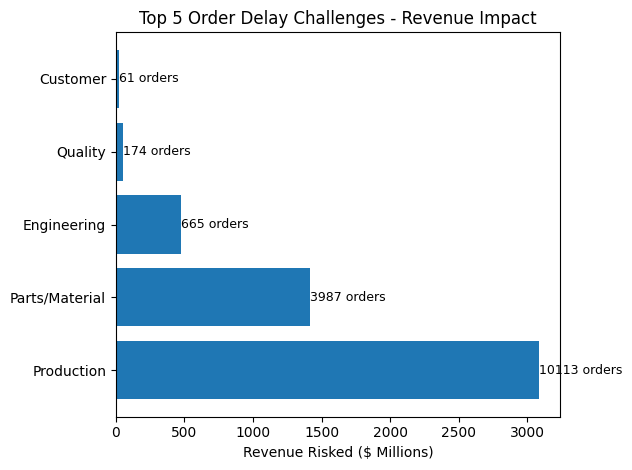

In [14]:
# Overall delays (may be completed, but definitely delayed)
print(f"\nPROMPT 3: What are the top five challenges delaying orders?")

all_delays = df[df['is_delayed'] == True]

# Analyze delay categories across all delayed orders
delay_analysis = all_delays.groupby('primary_delay_category').agg({'order_id': 'nunique', 
                                                                   'order_value_usd': 'sum', 
                                                                   'delay_days': 'mean'}).round(2)

delay_analysis.columns = ['Total_Orders_Affected', 'Total_Revenue_Impact', 'Avg_Delay_Days']
delay_analysis = delay_analysis.sort_values('Total_Orders_Affected', ascending=False)

print(f"\nTop 5 Challenges Delaying Orders")
print("-"*40)
print(delay_analysis.head())

# Visualize
# plt.figure(figsize=(10, 6))
top_5_delays = delay_analysis.head()
plt.barh(top_5_delays.index, top_5_delays['Total_Revenue_Impact'] / 1_000_000)
plt.xlabel('Revenue Risked ($ Millions)')
plt.title('Top 5 Order Delay Challenges - Revenue Impact')

for i, (idx, row) in enumerate(top_5_delays.iterrows()):
    plt.text(row['Total_Revenue_Impact']/1_000_000 + 0.5, i, f"{int(row['Total_Orders_Affected'])} orders", va='center', fontsize=9)
plt.tight_layout()
plt.show()

### For Active Orders


PROMPT 3: What are the top five challenges delaying orders?
Top 5 Challenges Causing Delays:
                        Order_Count  Revenue_At_Risk  Avg_Delay_Days
primary_delay_category                                              
Production                      248      88843448.38           11.25
Parts/Material                  136      41952785.45           18.27
Engineering                      22      12978444.79           24.36
Quality                           6        483258.79           20.50
Customer                          1         92207.74            1.00


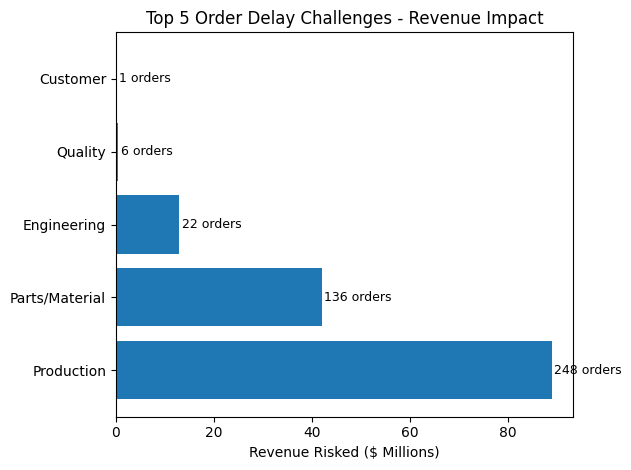

In [15]:
# Active delays (not completed, but delayed)
print(f"\nPROMPT 3: What are the top five challenges delaying orders?")

# Active delays (not completed orders)
active_delays = df[(df['is_delayed'] == True) & (df['order_status'].isin(['Pending', 'In_Production']))]

# Top delay categories
delay_analysis = active_delays.groupby('primary_delay_category').agg({'order_id': 'count', 
                                                                      'order_value_usd': 'sum', 
                                                                      'delay_days': 'mean'}).round(2)

delay_analysis.columns = ['Order_Count', 'Revenue_At_Risk', 'Avg_Delay_Days']
delay_analysis = delay_analysis.sort_values('Revenue_At_Risk', ascending=False)

print("Top 5 Challenges Causing Delays:")
print(delay_analysis.head())

# Visualize
# plt.figure(figsize=(10, 6))
top_5_delays = delay_analysis.head()
plt.barh(top_5_delays.index, top_5_delays['Revenue_At_Risk'] / 1_000_000)
plt.xlabel('Revenue Risked ($ Millions)')
plt.title('Top 5 Order Delay Challenges - Revenue Impact')

for i, (idx, row) in enumerate(top_5_delays.iterrows()):
    plt.text(row['Revenue_At_Risk']/1_000_000 + 0.5, i, f"{int(row['Order_Count'])} orders", va='center', fontsize=9)
plt.tight_layout()
plt.show()

## Prompt 4

### Overall


PROMPT 4: How much revenue is impacted because of these challenges (asked in the previous question)?

Revenue Impact Analysis
----------------------------------------
• Total Orders: 37,519
• Delayed Orders: 14,179 (37.8%)
• Total Revenue Risked: $1,208,990,350.39

Revenue Impact by Delay Severity:
                       Revenue_Risked  Order_Count  Avg_Delay_Days
delay_impact_severity                                             
High                     7.211931e+08         3922           32.67
Medium                   2.318585e+08         5747           21.79
Critical                 2.198893e+08          528           45.50
Low                      3.604943e+07         5249            8.08

Revenue Impact by Customer Tier:
               Revenue_Risked  Order_Count  Avg_Order_Value
customer_tier                                              
Gold             5.401890e+08         1406        384202.71
Silver           3.456544e+08         4640         74494.47
Bronze           3.0363

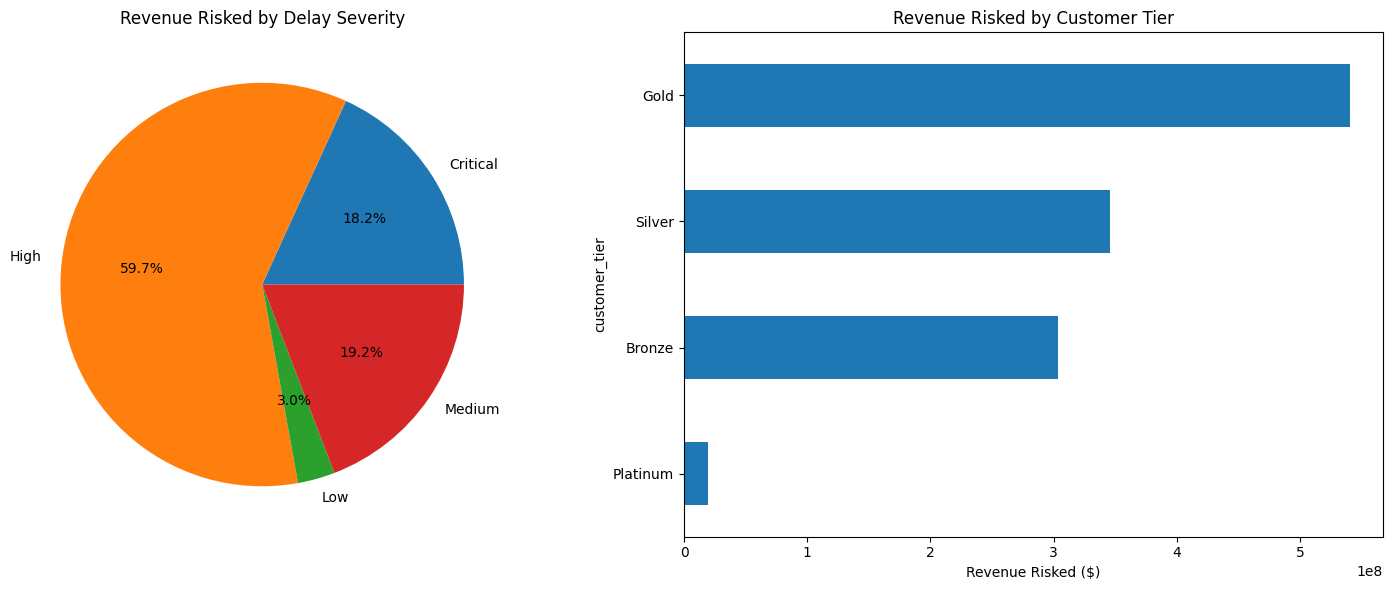

In [16]:
# Detailed revenue impact analysis
print(f"\nPROMPT 4: How much revenue is impacted because of these challenges (asked in the previous question)?")

print(f"\nRevenue Impact Analysis")
print("-"*40)

# Overall impact
total_orders = df['order_id'].nunique()
total_delayed_orders = all_delays['order_id'].nunique()
total_revenue_risked = all_delays['revenue_impact_usd'].sum()

print(f"• Total Orders: {total_orders:,}")
print(f"• Delayed Orders: {total_delayed_orders:,} ({total_delayed_orders/total_orders*100:.1f}%)")
print(f"• Total Revenue Risked: ${total_revenue_risked:,.2f}")

# Impact by severity
print(f"\nRevenue Impact by Delay Severity:")
severity_impact = all_delays.groupby('delay_impact_severity').agg({'revenue_impact_usd': 'sum', 
                                                                      'order_id': 'nunique', 
                                                                      'delay_days': 'mean'}).round(2)
severity_impact.columns = ['Revenue_Risked', 'Order_Count', 'Avg_Delay_Days']
print(severity_impact.sort_values('Revenue_Risked', ascending=False))

# Customer tier impact
print(f"\nRevenue Impact by Customer Tier:")
tier_impact = all_delays.groupby('customer_tier').agg({'revenue_impact_usd': 'sum', 'order_id': 'nunique'}).round(2)
tier_impact.columns = ['Revenue_Risked', 'Order_Count']
tier_impact['Avg_Order_Value'] = (tier_impact['Revenue_Risked'] / tier_impact['Order_Count']).round(2)
print(tier_impact.sort_values('Revenue_Risked', ascending=False))

# Create combined visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Severity pie chart
severity_impact['Revenue_Risked'].plot(kind='pie', ax=ax1, autopct='%1.1f%%')
ax1.set_title('Revenue Risked by Delay Severity')
ax1.set_ylabel('')

# Customer tier bar chart
tier_impact['Revenue_Risked'].sort_values().plot(kind='barh', ax=ax2)
ax2.set_xlabel('Revenue Risked ($)')
ax2.set_title('Revenue Risked by Customer Tier')

plt.tight_layout()
plt.show()

### For Active Orders


PROMPT 4: How much revenue is impacted because of these challenges (asked in the previous question)?

Revenue Impact Analysis
----------------------------------------
• Total Active Orders: 4,856
• Delayed Orders: 401 (8.3%)
• Total Revenue at Risk: $438,162.30

Revenue Impact by Delay Severity:
                       Revenue_At_Risk  Order_Count  Avg_Delay_Days
delay_impact_severity                                              
Medium                       343577.08          114           18.12
High                          66888.57           93           19.62
Critical                      15325.95           24           30.58
Low                           12370.70          177            7.14

Revenue Impact by Customer Tier:
               Revenue_At_Risk  Order_Count  Avg_Order_Value
customer_tier                                               
Gold                 193478.55           32          6046.20
Bronze               172675.63          245           704.80
Silver          

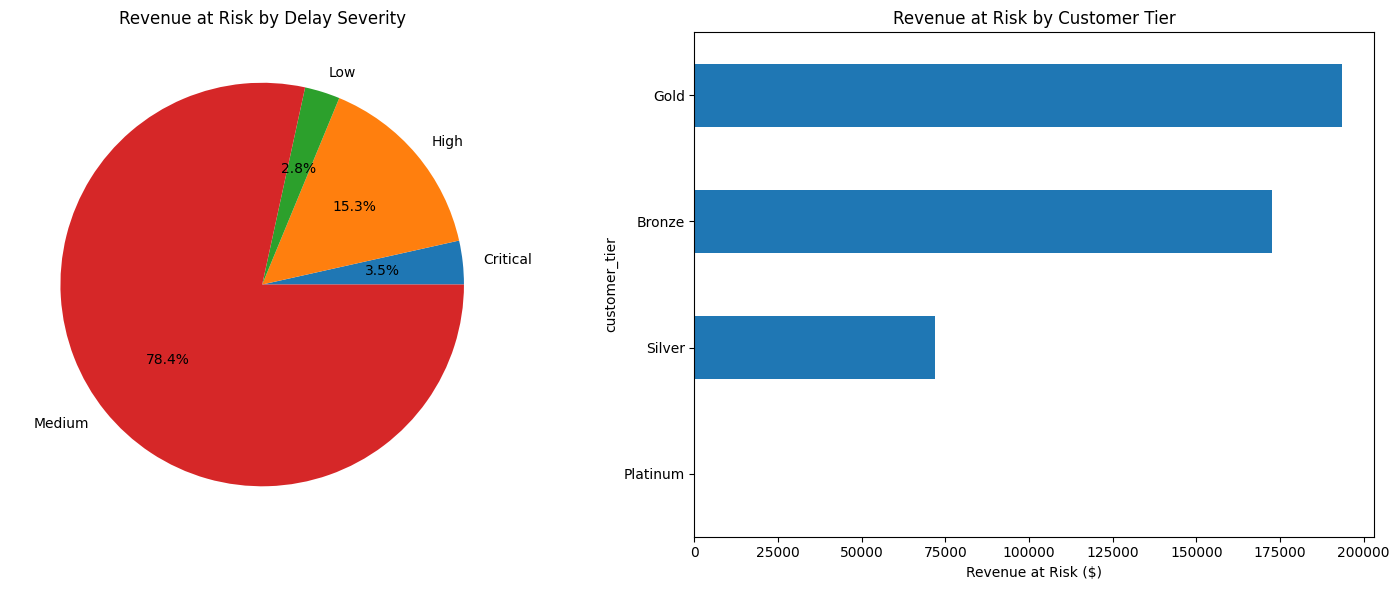

In [17]:
# Detailed revenue impact analysis
print(f"\nPROMPT 4: How much revenue is impacted because of these challenges (asked in the previous question)?")

print(f"\nRevenue Impact Analysis")
print("-"*40)

# Overall impact
total_active_orders = df[df['order_status'].isin(['Pending', 'In_Production'])]['order_id'].nunique()
total_delayed_orders = active_delays['order_id'].nunique()
total_revenue_at_risk = active_delays['revenue_impact_usd'].sum()

print(f"• Total Active Orders: {total_active_orders:,}")
print(f"• Delayed Orders: {total_delayed_orders:,} ({total_delayed_orders/total_active_orders*100:.1f}%)")
print(f"• Total Revenue at Risk: ${total_revenue_at_risk:,.2f}")

# Impact by severity
print(f"\nRevenue Impact by Delay Severity:")
severity_impact = active_delays.groupby('delay_impact_severity').agg({'revenue_impact_usd': 'sum', 
                                                                      'order_id': 'nunique', 
                                                                      'delay_days': 'mean'}).round(2)
severity_impact.columns = ['Revenue_At_Risk', 'Order_Count', 'Avg_Delay_Days']
print(severity_impact.sort_values('Revenue_At_Risk', ascending=False))

# Customer tier impact
print(f"\nRevenue Impact by Customer Tier:")
tier_impact = active_delays.groupby('customer_tier').agg({'revenue_impact_usd': 'sum', 'order_id': 'nunique'}).round(2)
tier_impact.columns = ['Revenue_At_Risk', 'Order_Count']
tier_impact['Avg_Order_Value'] = (tier_impact['Revenue_At_Risk'] / tier_impact['Order_Count']).round(2)
print(tier_impact.sort_values('Revenue_At_Risk', ascending=False))

# Create combined visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Severity pie chart
severity_impact['Revenue_At_Risk'].plot(kind='pie', ax=ax1, autopct='%1.1f%%')
ax1.set_title('Revenue at Risk by Delay Severity')
ax1.set_ylabel('')

# Customer tier bar chart
tier_impact['Revenue_At_Risk'].sort_values().plot(kind='barh', ax=ax2)
ax2.set_xlabel('Revenue at Risk ($)')
ax2.set_title('Revenue at Risk by Customer Tier')

plt.tight_layout()
plt.show()

# Prompt 5 and beyond (Prioritization and Prediction)

In [18]:
# AI/ML imports
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, mean_absolute_error
from collections import Counter
import itertools

## Data Preparation Functions

In [19]:
def prepare_order_data(df, current_date=None):
    """Prepare order dataset with derived fields and proper data types"""
    df = df.copy()
    
    if current_date is None:
        current_date = pd.Timestamp.now()
    
    # Convert date columns
    date_columns = ['order_date', 'requested_delivery_date', 'planned_delivery_date', 'actual_delivery_date', 
                    'planned_production_start_date', 'actual_production_start_date', 
                    'planned_production_end_date', 'actual_production_end_date', 
                    'engineering_approval_date', 'constraint_start_date', 'expected_resolution_date']
    
    for col in date_columns:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')
    
    # Redefine days_until_requirement as requested
    df['days_until_requirement'] = (df['requested_delivery_date'] - current_date).dt.days
    
    # Add derived fields
    df['is_overdue'] = df['days_until_requirement'] < 0
    
    # Convert string fields to numeric where needed
    df['cycle_time_days'] = pd.to_numeric(df['cycle_time_days'], errors='coerce')
    df['quality_score'] = pd.to_numeric(df['quality_score'], errors='coerce')
    df['resolution_days'] = pd.to_numeric(df['resolution_days'], errors='coerce')
    df['fleet_size'] = pd.to_numeric(df['fleet_size'], errors='coerce')
    
    # Fill NaN values with reasonable defaults
    df['quality_score'] = df['quality_score'].fillna(95.0)
    df['fleet_size'] = df['fleet_size'].fillna(1.0)
    
    return df

In [20]:
def get_active_orders(df, current_month_only=False, current_date=None):
    """Filter for orders that need prioritization (not completed/canceled)"""
    
    if current_date is None:
        current_date = pd.Timestamp.now()
    
    # Filter for active orders
    active_mask = df['order_status'].isin(['In_Production', 'Pending'])
    
    if current_month_only:
        # Include orders due this month or overdue
        current_month = current_date.month
        current_year = current_date.year
        
        delivery_this_month = ((df['requested_delivery_date'].dt.month == current_month) & 
                               (df['requested_delivery_date'].dt.year == current_year))
        
        overdue = df['requested_delivery_date'] < current_date
        time_mask = delivery_this_month | overdue
        active_mask = active_mask & time_mask
    
    active_orders = df[active_mask].copy()
    print(f"Found {len(active_orders)} active orders for prioritization")
    
    return active_orders

## AI Model Training Functions

In [21]:
def prepare_features_for_delay_prediction(df):
    """Prepare features for delay prediction ML models"""
    
    # Select relevant features for delay prediction
    feature_columns = ['parts_availability', 'supply_risk_score', 'technical_complexity_score', 
                       'capacity_available_percent', 'previous_constraints_count', 
                       'inventory_shortage_count', 'longest_lead_time_days', 
                       'labor_hours_required', 'competing_orders_count', 'days_until_requirement']
    
    # Add categorical features (encoded)
    categorical_features = ['engineering_status', 'build_complexity', 'condition', 'customer_tier', 'product_category']
    
    df_features = df.copy()
    
    # Encode categorical variables
    label_encoders = {}
    for cat_col in categorical_features:
        if cat_col in df_features.columns:
            le = LabelEncoder()
            df_features[cat_col + '_encoded'] = le.fit_transform(df_features[cat_col].astype(str))
            label_encoders[cat_col] = le
            feature_columns.append(cat_col + '_encoded')
    
    # Handle missing values
    for col in feature_columns:
        if col in df_features.columns:
            df_features[col] = df_features[col].fillna(df_features[col].median())
    
    return df_features[feature_columns], label_encoders

In [22]:
def train_delay_prediction_models(df):
    """Train AI models to predict delay probability and delay duration
    Uses historical data where is_delayed and delay_days are known"""
    
    print("Training AI models for delay prediction...")
    
    # Prepare features
    X, label_encoders = prepare_features_for_delay_prediction(df)
    
    # Target variables
    y_delayed = df['is_delayed'].astype(int)  # Classification target
    y_delay_days = df['delay_days'].fillna(0)  # Regression target
    
    # Split data
    X_train, X_test, y_delayed_train, y_delayed_test, y_days_train, y_days_test = train_test_split(X, y_delayed, y_delay_days, test_size=0.2, random_state=42)
    
    # Train classification model (will order be delayed?)
    delay_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    delay_classifier.fit(X_train, y_delayed_train)
    
    # Train regression model (how many days delayed?)
    # Only train on delayed orders
    delayed_mask = y_days_train > 0
    X_delayed_train = X_train[delayed_mask]
    y_delayed_days_train = y_days_train[delayed_mask]
    
    delay_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
    if len(X_delayed_train) > 0:
        delay_regressor.fit(X_delayed_train, y_delayed_days_train)
    else:
        delay_regressor = None
    
    # Evaluate models
    y_pred_delayed = delay_classifier.predict(X_test)
    accuracy = (y_pred_delayed == y_delayed_test).mean()
    print(f"Delay classification accuracy: {accuracy:.3f}")
    
    if delay_regressor is not None:
        delayed_test_mask = y_days_test > 0
        if delayed_test_mask.sum() > 0:
            X_delayed_test = X_test[delayed_test_mask]
            y_delayed_days_test = y_days_test[delayed_test_mask]
            y_pred_days = delay_regressor.predict(X_delayed_test)
            mae = mean_absolute_error(y_delayed_days_test, y_pred_days)
            print(f"Delay days prediction MAE: {mae:.1f} days")
    
    return {'delay_classifier': delay_classifier, 
            'delay_regressor': delay_regressor, 
            'label_encoders': label_encoders, 
            'feature_columns': X.columns.tolist()
           }

In [23]:
def train_customer_satisfaction_model(df):
    """AI model to predict customer satisfaction risk based on delay patterns"""
    
    print("Training customer satisfaction risk model...")
    
    # Features that affect customer satisfaction
    satisfaction_features = ['delay_days', 'previous_constraints_count', 'order_value_usd', 
                             'customer_tier', 'days_until_requirement', 'is_delayed']
    
    # Prepare features
    df_clean = df.dropna(subset=['customer_satisfaction'])
    
    # Create categorical encodings
    tier_encoder = LabelEncoder()
    df_clean['customer_tier_encoded'] = tier_encoder.fit_transform(df_clean['customer_tier'].astype(str))
    
    feature_cols = ['delay_days', 'previous_constraints_count', 'order_value_usd',
                   'customer_tier_encoded', 'days_until_requirement', 'is_delayed']
    
    X = df_clean[feature_cols].fillna(0)
    y = df_clean['customer_satisfaction']
    
    # Create binary target: satisfaction risk (satisfaction < 4.0)
    y_risk = (y < 4.0).astype(int)
    
    if len(X) > 10:  # Need minimum data to train
        X_train, X_test, y_train, y_test = train_test_split(X, y_risk, test_size=0.2, random_state=42)
        
        satisfaction_model = RandomForestClassifier(n_estimators=50, random_state=42)
        satisfaction_model.fit(X_train, y_train)
        
        accuracy = satisfaction_model.score(X_test, y_test)
        print(f"Customer satisfaction risk prediction accuracy: {accuracy:.3f}")
        
        return {'satisfaction_model': satisfaction_model, 
                'tier_encoder': tier_encoder, 
                'feature_columns': feature_cols
               }
    else:
        print("Insufficient data for satisfaction model training")
        return None

In [24]:
def train_intervention_success_models(df):
    """AI models to predict intervention success rates and timelines"""
    print("Training intervention success prediction models...")
    
    # This would ideally use historical intervention data
    # For now, we'll create a simplified model based on constraint resolution patterns
    
    # Filter orders where constraints were resolved
    resolved_orders = df[df['constraint_resolved']=='True'].copy()
    
    if len(resolved_orders) < 10:
        print("Insufficient intervention data for training")
        return None
    
    # Features for intervention success
    intervention_features = ['supply_risk_score', 'parts_availability', 'capacity_available_percent', 
                             'technical_complexity_score', 'days_until_requirement']
    
    # Targets: resolution success and time to resolve
    X = resolved_orders[intervention_features].fillna(0)
    y_success = (resolved_orders['resolution_days'].fillna(999) < 30).astype(int)  # Success = resolved in <30 days
    y_timeline = resolved_orders['resolution_days'].fillna(30)
    
    if len(X) > 5:
        success_model = RandomForestClassifier(n_estimators=50, random_state=42)
        success_model.fit(X, y_success)
        
        timeline_model = RandomForestRegressor(n_estimators=50, random_state=42)
        timeline_model.fit(X, y_timeline)
        
        return {'success_model': success_model, 
                'timeline_model': timeline_model, 
                'feature_columns': intervention_features
               }
    
    return None

## AI-Powered Prediction Functions

In [25]:
def predict_delay_risk_ai(row, trained_models):
    """AI-powered delay risk prediction using trained ML models"""
    
    if trained_models is None:
        return predict_delay_risk_fallback(row)
    
    try:
        # Prepare features for this order
        features = []
        for col in trained_models['feature_columns']:
            if '_encoded' in col:
                # Handle categorical encoding
                base_col = col.replace('_encoded', '')
                if base_col in row.index:
                    encoded_val = trained_models['label_encoders'][base_col].transform([str(row[base_col])])[0]
                    features.append(encoded_val)
                else:
                    features.append(0)
            else:
                features.append(row.get(col, 0))
        
        # Predict delay probability
        delay_prob = trained_models['delay_classifier'].predict_proba([features])[0][1]
        
        # Predict delay days if likely to be delayed
        if delay_prob > 0.3 and trained_models['delay_regressor'] is not None:
            predicted_days = max(0, trained_models['delay_regressor'].predict([features])[0])
        else:
            predicted_days = 0
        
        # Generate AI-based risk factors
        feature_importance = trained_models['delay_classifier'].feature_importances_
        important_features = []
        
        for i, (feature, importance) in enumerate(zip(trained_models['feature_columns'], feature_importance)):
            if importance > 0.1 and features[i] != 0:  # Important features with non-zero values
                important_features.append(f"AI identified: {feature}")
        
        if not important_features:
            important_features = ["AI model prediction based on historical patterns"]
        
        return delay_prob, predicted_days, important_features[:3]  # Top 3 factors
        
    except Exception as e:
        print(f"AI prediction failed: {e}, falling back to rule-based")
        return predict_delay_risk_fallback(row)

In [26]:
def predict_delay_risk_fallback(row):
    """Fallback rule-based delay prediction"""
    
    delay_probability = 0.0
    expected_delay_days = 0
    risk_factors = []
    
    # Engineering risks
    eng_status = str(row.get('engineering_status', '')).lower()
    if eng_status == 'pending':
        delay_probability += 0.6
        expected_delay_days += 14
        risk_factors.append("Engineering approval pending")
    elif 'review' in eng_status:
        delay_probability += 0.3
        expected_delay_days += 7
        risk_factors.append("Engineering under review")
    
    # Parts availability
    parts_avail = row.get('parts_availability', 100)
    if parts_avail < 80:
        delay_probability += 0.5
        expected_delay_days += 12
        risk_factors.append(f"Low parts availability ({parts_avail:.1f}%)")
    
    # Supply chain risk
    supply_risk = row.get('supply_risk_score', 1)
    if supply_risk > 6:
        delay_probability += 0.4
        expected_delay_days += 10
        risk_factors.append("High supply chain risk")
    
    # Timeline pressure
    days_until = row.get('days_until_requirement', 0)
    if days_until < 0:
        delay_probability += 0.8
        expected_delay_days += abs(days_until)
        risk_factors.append(f"Already overdue by {abs(days_until)} days")
    
    return min(delay_probability, 0.95), expected_delay_days, risk_factors

In [27]:
def predict_customer_satisfaction_risk(row, satisfaction_model):
    """AI-powered customer satisfaction risk prediction"""
    
    if satisfaction_model is None:
        # Fallback to rule-based
        satisfaction = row.get('customer_satisfaction', 5.0)
        return 1.0 if satisfaction < 3.5 else 0.0
    
    try:
        # Prepare features
        features = [row.get('delay_days', 0), 
                    row.get('previous_constraints_count', 0), 
                    row.get('order_value_usd', 0), 
                    satisfaction_model['tier_encoder'].transform([str(row.get('customer_tier', 'Bronze'))])[0], 
                    row.get('days_until_requirement', 0), 
                    row.get('is_delayed', False)
                   ]
        
        # Predict satisfaction risk
        risk_prob = satisfaction_model['satisfaction_model'].predict_proba([features])[0][1]
        return risk_prob
        
    except Exception as e:
        print(f"Satisfaction prediction failed: {e}")
        satisfaction = row.get('customer_satisfaction', 5.0)
        return 1.0 if satisfaction < 3.5 else 0.0

In [28]:
def predict_intervention_success(row, intervention_type, intervention_models):
    """AI-powered intervention success rate and timeline prediction"""
    
    if intervention_models is None:
        # Fallback to rule-based estimates
        if intervention_type == 'engineering':
            return 0.7, 10  # 70% success, 10 days
        elif intervention_type == 'supply':
            return 0.6, 15  # 60% success, 15 days
        elif intervention_type == 'production':
            return 0.8, 7   # 80% success, 7 days
        else:
            return 0.5, 20  # 50% success, 20 days
    
    try:
        # Prepare features
        features = [row.get('supply_risk_score', 1), 
                    row.get('parts_availability', 100), 
                    row.get('capacity_available_percent', 30), 
                    row.get('technical_complexity_score', 1), 
                    row.get('days_until_requirement', 30)
                   ]
        
        # Predict success probability and timeline
        success_prob = intervention_models['success_model'].predict_proba([features])[0][1]
        timeline = max(1, intervention_models['timeline_model'].predict([features])[0])
        
        return success_prob, timeline
        
    except Exception as e:
        print(f"Intervention prediction failed: {e}")
        return 0.5, 15  # Default fallback

## Scoring Functions

In [29]:
def calculate_revenue_priority_score(row, delay_models):
    """Revenue/Profit impact scoring with AI-enhanced predictions"""
    score = 0
    
    # 1. Base order value impact (25 points)
    order_value = row.get('order_value_usd', 0)
    if order_value > 1000000:
        score += 25
    elif order_value > 500000:
        score += 20
    elif order_value > 200000:
        score += 15
    elif order_value > 100000:
        score += 10
    elif order_value > 50000:
        score += 5
    
    # 2. AI-predicted revenue at risk (25 points)
    delay_prob, expected_days, _ = predict_delay_risk_ai(row, delay_models)
    
    # Calculate potential penalties and storage costs
    potential_penalty = row.get('late_delivery_penalty_usd', 0) * delay_prob
    storage_daily = row.get('storage_holding_cost_usd', 0) / 30
    potential_storage = storage_daily * expected_days * delay_prob
    total_risk = potential_penalty + potential_storage
    
    if total_risk > 100000:
        score += 25
    elif total_risk > 50000:
        score += 20
    elif total_risk > 20000:
        score += 15
    elif total_risk > 10000:
        score += 10
    elif total_risk > 5000:
        score += 5
    
    # 3. Profit margin protection (20 points)
    profit_margin = row.get('profit_margin_percent', 0)
    if profit_margin > 30:
        score += 20
    elif profit_margin > 20:
        score += 15
    elif profit_margin > 10:
        score += 10
    elif profit_margin > 5:
        score += 5
    
    # 4. Rush order premium at risk (15 points)
    rush_premium = row.get('rush_order_premium_usd', 0)
    if rush_premium > 100000:
        score += 15
    elif rush_premium > 50000:
        score += 12
    elif rush_premium > 20000:
        score += 8
    elif rush_premium > 10000:
        score += 5
    elif rush_premium > 0:
        score += 3
    
    # 5. Payment terms risk (10 points)
    payment_terms = row.get('payment_terms_days', 0)
    credit_rating = str(row.get('customer_credit_rating', '')).upper()
    
    if payment_terms == 0 and credit_rating in ['AAA', 'AA']:
        score += 10
    elif payment_terms <= 30 and credit_rating in ['AAA', 'AA', 'A']:
        score += 7
    elif payment_terms <= 60:
        score += 5
    else:
        score += 2
    
    # 6. Currency stability (5 points)
    currency = str(row.get('currency', '')).upper()
    if currency == 'USD':
        score += 5
    elif currency == 'CAD':
        score += 3
    
    return min(score, 100)

In [30]:
def calculate_customer_priority_score(row, satisfaction_model, delay_models):
    """Customer relationship priority with AI-enhanced satisfaction risk prediction"""
    score = 0
    
    # 1. Customer tier (30 points)
    tier = str(row.get('customer_tier', '')).lower()
    if tier == 'platinum':
        score += 30
    elif tier == 'gold':
        score += 22
    elif tier == 'silver':
        score += 15
    elif tier == 'bronze':
        score += 8
    
    # 2. Customer type and visibility (25 points)
    customer_type = str(row.get('customer_type', '')).lower()
    if customer_type == 'government':
        score += 25
    elif customer_type == 'fleet':
        score += 20
    elif customer_type == 'dealer':
        score += 15
    elif customer_type == 'individual':
        score += 8
    
    # 3. Customer relationship value (20 points)
    previous_orders = row.get('previous_orders_count', 0)
    ytd_revenue = row.get('customer_revenue_ytd', 0)
    
    if previous_orders > 50 and ytd_revenue > 10000000:
        score += 20
    elif previous_orders > 20 and ytd_revenue > 5000000:
        score += 17
    elif previous_orders > 10 and ytd_revenue > 1000000:
        score += 14
    elif previous_orders > 5 and ytd_revenue > 500000:
        score += 10
    elif previous_orders > 1:
        score += 6
    elif previous_orders > 0:
        score += 3
    
    # 4. AI-powered customer satisfaction risk (15 points)
    satisfaction_risk = predict_customer_satisfaction_risk(row, satisfaction_model)
    delay_prob, _, _ = predict_delay_risk_ai(row, delay_models)
    
    # High satisfaction risk gets immediate attention
    if satisfaction_risk > 0.7:
        score += 15
    elif satisfaction_risk > 0.5 and delay_prob > 0.5:
        score += 12
    elif satisfaction_risk > 0.3:
        score += 8
    else:
        score += 5  # Keep good customers happy
    
    # 5. Fleet size impact (10 points)
    fleet_size = row.get('fleet_size', 1)
    if fleet_size > 1000:
        score += 10
    elif fleet_size > 500:
        score += 8
    elif fleet_size > 100:
        score += 6
    elif fleet_size > 50:
        score += 4
    elif fleet_size > 10:
        score += 2
    
    return min(score, 100)

In [31]:
def calculate_reputation_priority_score(row, delay_models):
    """Reputation/public image risk with AI-enhanced delay predictions"""
    score = 0
    
    # 1. Public visibility amplification (35 points)
    customer_type = str(row.get('customer_type', '')).lower()
    product_category = str(row.get('product_category', '')).lower()
    vehicle_model = str(row.get('vehicle_model', '')).lower()
    customer_name = str(row.get('customer_name', '')).lower()
    
    # Government contracts = maximum visibility
    if customer_type == 'government':
        if 'federal' in customer_name or 'gsa' in customer_name:
            score += 35
        elif 'state' in customer_name or 'dot' in customer_name:
            score += 30
        else:
            score += 25
    
    # School bus delays = community impact
    elif 'school' in vehicle_model and product_category == 'bus':
        score += 32
    
    # Large fleet operations = industry visibility
    elif customer_type == 'fleet':
        fleet_size = row.get('fleet_size', 1)
        if fleet_size > 1000:
            score += 28
        elif fleet_size > 500:
            score += 22
        elif fleet_size > 100:
            score += 18
        else:
            score += 12
    
    # Public transit = community impact
    elif product_category == 'bus' and 'transit' in vehicle_model:
        score += 25
    
    # 2. AI-predicted escalation and media risk (25 points)
    delay_prob, expected_days, _ = predict_delay_risk_ai(row, delay_models)
    order_value = row.get('order_value_usd', 0)
    
    # High-value + high-probability delays = escalation risk
    if delay_prob > 0.7 and order_value > 1000000:
        score += 25
    elif delay_prob > 0.6 and order_value > 500000:
        score += 20
    elif delay_prob > 0.5 and order_value > 200000:
        score += 15
    elif delay_prob > 0.4 and expected_days > 14:
        score += 10
    elif delay_prob > 0.3:
        score += 5
    
    # 3. Historical escalation patterns (20 points)
    prev_constraints = row.get('previous_constraints_count', 0)
    escalation = str(row.get('escalation_level', '')).lower()
    
    if prev_constraints > 15:
        score += 20
    elif prev_constraints > 10:
        score += 15
    elif prev_constraints > 5:
        score += 10
    elif prev_constraints > 2:
        score += 5
    
    # Current escalation level
    if escalation == 'director':
        score += 15
    elif escalation == 'manager':
        score += 10
    elif escalation == 'supervisor':
        score += 5
    
    # 4. Seasonal and timing sensitivity (10 points)
    season = str(row.get('season', '')).lower()
    is_holiday = row.get('is_holiday_period', False)
    days_until = row.get('days_until_requirement', 0)
    
    # School bus timing is critical
    if 'school' in vehicle_model:
        if season == 'summer':
            score += 10
        elif season == 'spring':
            score += 7
    
    # Holiday period deliveries
    if is_holiday and days_until < 30:
        score += 8
    
    # Winter weather impact
    if season == 'winter' and product_category in ['bus', 'truck']:
        score += 5
    
    # 5. Overdue orders (10 points)
    if days_until < 0:
        overdue_days = abs(days_until)
        if overdue_days > 30:
            score += 10
        elif overdue_days > 14:
            score += 7
        elif overdue_days > 7:
            score += 5
        else:
            score += 3
    
    return min(score, 100)

In [32]:
def calculate_intervention_feasibility_score(row, intervention_models):
    """AI-enhanced intervention feasibility scoring with success rate predictions"""
    score = 0
    
    # 1. Engineering intervention potential (25 points)
    eng_status = str(row.get('engineering_status', '')).lower()
    custom_required = row.get('custom_engineering_required', False)
    
    if eng_status == 'approved' and not custom_required:
        score += 25
    elif eng_status == 'approved' and custom_required:
        score += 20
    elif 'review' in eng_status:
        # Use AI to predict intervention success
        success_rate, timeline = predict_intervention_success(row, 'engineering', intervention_models)
        score += int(15 * success_rate)  # Scale by predicted success rate
    elif eng_status == 'pending':
        success_rate, timeline = predict_intervention_success(row, 'engineering', intervention_models)
        score += int(10 * success_rate)
    
    # 2. Supply chain intervention potential (25 points)
    parts_avail = row.get('parts_availability', 100)
    supply_risk = row.get('supply_risk_score', 1)
    
    if parts_avail >= 95 and supply_risk <= 3:
        score += 25
    elif parts_avail >= 90 and supply_risk <= 5:
        score += 20
    else:
        # Use AI to predict supply intervention success
        success_rate, timeline = predict_intervention_success(row, 'supply', intervention_models)
        if parts_avail >= 80:
            score += int(15 * success_rate)
        elif parts_avail >= 70:
            score += int(10 * success_rate)
        else:
            score += int(5 * success_rate)
    
    # 3. Production capacity flexibility (20 points)
    capacity_avail = row.get('capacity_available_percent', 100)
    complexity = str(row.get('build_complexity', '')).lower()
    labor_hours = row.get('labor_hours_required', 0)
    
    if capacity_avail > 25 and complexity == 'standard' and labor_hours < 1000:
        score += 20
    elif capacity_avail > 20 and complexity != 'complex':
        score += 15
    else:
        # Use AI to predict production intervention success
        success_rate, timeline = predict_intervention_success(row, 'production', intervention_models)
        if capacity_avail > 15:
            score += int(12 * success_rate)
        elif capacity_avail > 10:
            score += int(8 * success_rate)
        else:
            score += int(4 * success_rate)
    
    # 4. Quality intervention potential (15 points)
    quality_status = str(row.get('quality_check_status', '')).lower()
    quality_score = row.get('quality_score', 95)
    rework_required = str(row.get('rework_required', '')).lower()
    
    if quality_status == 'passed' and quality_score > 95 and rework_required != 'true':
        score += 15
    elif quality_status in ['passed', 'n/a'] and quality_score > 90:
        score += 12
    elif quality_status == 'in_progress':
        score += 8
    elif quality_status == 'pending':
        score += 5
    else:
        score += 2
    
    # 5. Timeline intervention potential (15 points)
    days_until = row.get('days_until_requirement', 0)
    order_priority = str(row.get('order_priority', '')).lower()
    
    if days_until > 60:
        score += 15
    elif days_until > 30:
        score += 12
    elif days_until > 14:
        score += 8
    elif days_until > 7:
        score += 5
    elif days_until > 0:
        score += 2
    else:
        score += 1
    
    # Priority orders get intervention boost
    if order_priority == 'critical':
        score += 5
    elif order_priority == 'high':
        score += 3
    
    return min(score, 100)

## Main Prioritization Function with Reasoning

In [33]:
def prioritize_orders(df, trained_models, weights=None):
    """Main prioritization function combining AI predictions with business scoring"""
    
    if weights is None:
        weights = {'revenue': 0.35, 
                   'customer': 0.30, 
                   'reputation': 0.25, 
                   'feasibility': 0.10
                  }
    
    if len(df) == 0:
        print("No orders to prioritize")
        return pd.DataFrame()
    
    df_prioritized = df.copy()
    
    # Calculate individual priority scores
    print("Calculating revenue priority scores...")
    df_prioritized['revenue_score'] = df_prioritized.apply(
        lambda row: calculate_revenue_priority_score(row, trained_models.get('delay_models')), axis=1)
    
    print("Calculating customer priority scores...")
    df_prioritized['customer_score'] = df_prioritized.apply(
        lambda row: calculate_customer_priority_score(row, trained_models.get('satisfaction_model'), trained_models.get('delay_models')), axis=1)
    
    print("Calculating reputation priority scores...")
    df_prioritized['reputation_score'] = df_prioritized.apply(
        lambda row: calculate_reputation_priority_score(row, trained_models.get('delay_models')), axis=1)
    
    print("Calculating intervention feasibility scores...")
    df_prioritized['feasibility_score'] = df_prioritized.apply(
        lambda row: calculate_intervention_feasibility_score(row, trained_models.get('intervention_models')), axis=1)
    
    # Calculate AI delay predictions
    print("Generating AI delay predictions...")
    delay_predictions = df_prioritized.apply(
        lambda row: predict_delay_risk_ai(row, trained_models.get('delay_models')), axis=1)
    
    df_prioritized['predicted_delay_probability'] = delay_predictions.apply(lambda x: x[0])
    df_prioritized['predicted_delay_days'] = delay_predictions.apply(lambda x: x[1])
    df_prioritized['ai_risk_factors'] = delay_predictions.apply(lambda x: '; '.join(x[2]))
    
    # Calculate composite priority score
    df_prioritized['priority_score'] = (df_prioritized['revenue_score'] * weights['revenue'] + 
                                        df_prioritized['customer_score'] * weights['customer'] + 
                                        df_prioritized['reputation_score'] * weights['reputation'] + 
                                        df_prioritized['feasibility_score'] * weights['feasibility']
                                       )
    
    # Add priority reasoning
    df_prioritized['priority_reason'] = df_prioritized.apply(generate_priority_reason, axis=1)
    
    # Sort by priority score
    df_prioritized = df_prioritized.sort_values('priority_score', ascending=False).reset_index(drop=True)
    
    print(f"Prioritization complete! {len(df_prioritized)} orders ranked.")
    return df_prioritized

In [34]:
def generate_priority_reason(row):
    """Generate human-readable explanation for order prioritization"""
    reasons = []
    
    # High-impact reasons
    if row['revenue_score'] > 70:
        if row.get('order_value_usd', 0) > 1000000:
            reasons.append("High-value order ($1M+)")
        if row.get('predicted_delay_probability', 0) > 0.6:
            reasons.append("High revenue at risk")
    
    if row['customer_score'] > 70:
        if row.get('customer_tier', '').lower() == 'platinum':
            reasons.append("Platinum customer")
        if row.get('customer_type', '').lower() == 'government':
            reasons.append("Government contract")
    
    if row['reputation_score'] > 60:
        if 'school' in str(row.get('vehicle_model', '')).lower():
            reasons.append("School bus delivery")
        if row.get('predicted_delay_probability', 0) > 0.5:
            reasons.append("High delay risk")
        if row.get('days_until_requirement', 0) < 0:
            reasons.append("Already overdue")
    
    if row['feasibility_score'] > 70:
        reasons.append("High intervention potential")
    elif row['feasibility_score'] < 30:
        reasons.append("Complex constraints")
    
    # AI-specific reasons
    delay_prob = row.get('predicted_delay_probability', 0)
    if delay_prob > 0.7:
        reasons.append("AI: Critical delay risk")
    elif delay_prob > 0.5:
        reasons.append("AI: Significant delay risk")
    
    return "; ".join(reasons) if reasons else "Standard priority"

## Analysis and Reporting Functions

In [35]:
def get_top_priorities(df_prioritized, n=20):
    """Get top N priority orders with detailed analysis"""
    
    if len(df_prioritized) == 0:
        return pd.DataFrame()
    
    columns = ['order_id', 'customer_name', 'customer_tier', 'customer_type', 
               'product_category', 'vehicle_model', 'condition', 'order_value_usd', 
               'days_until_requirement', 'is_overdue', 'engineering_status', 
               'parts_availability', 'build_complexity', 'predicted_delay_probability', 
               'predicted_delay_days', 'priority_score', 'revenue_score', 
               'customer_score', 'reputation_score', 'feasibility_score', 
               'priority_reason', 'ai_risk_factors'
              ]
    
    available_columns = [col for col in columns if col in df_prioritized.columns]
    return df_prioritized[available_columns].head(n)

In [36]:
def generate_executive_summary(df_prioritized):
    """Generate executive summary with AI insights"""
    
    if len(df_prioritized) == 0:
        return "No active orders found for prioritization."
    
    total_orders = len(df_prioritized)
    high_priority = len(df_prioritized[df_prioritized['priority_score'] > 70])
    critical_ai_risk = len(df_prioritized[df_prioritized['predicted_delay_probability'] > 0.7])
    overdue_orders = len(df_prioritized[df_prioritized['is_overdue'] == True])
    
    total_value_at_risk = df_prioritized['order_value_usd'].sum()
    avg_priority_score = df_prioritized['priority_score'].mean()
    avg_ai_delay_risk = df_prioritized['predicted_delay_probability'].mean()
    
    # Customer tier breakdown
    tier_breakdown = df_prioritized['customer_tier'].value_counts()
    
    # AI-identified constraints
    eng_pending = len(df_prioritized[df_prioritized['engineering_status'] == 'Pending'])
    parts_shortage = len(df_prioritized[df_prioritized['parts_availability'] < 90])
    complex_builds = len(df_prioritized[df_prioritized['build_complexity'] == 'Complex'])
    
    # Condition breakdown
    condition_breakdown = df_prioritized['condition'].value_counts()
    
    summary = f"""
AI-POWERED PREDICTIVE ORDER PRIORITIZATION SUMMARY
====================================================

ACTIVE ORDERS OVERVIEW:
• Total Active Orders: {total_orders:,}
• High Priority Orders (Score >70): {high_priority:,}
• AI-Identified Critical Delay Risk (>70%): {critical_ai_risk:,}
• Already Overdue: {overdue_orders:,}
• Total Value at Risk: ${total_value_at_risk:,.0f}

AI PREDICTION METRICS:
• Average Priority Score: {avg_priority_score:.1f}/100
• Average AI Delay Risk: {avg_ai_delay_risk:.1%}

CUSTOMER BREAKDOWN:
{tier_breakdown.to_string()}

VEHICLE CONDITION:
{condition_breakdown.to_string()}

AI-IDENTIFIED CONSTRAINT AREAS:
• Engineering Approvals Pending: {eng_pending:,} orders
• Parts Availability Issues (<90%): {parts_shortage:,} orders
• Complex Build Requirements: {complex_builds:,} orders

AI-DRIVEN RECOMMENDATIONS:
• Focus on top 15 priority orders for maximum ROI
• AI models predict {critical_ai_risk} orders at critical delay risk
• Proactive intervention needed for overdue orders
• Machine learning identifies constraint patterns for prevention

PREDICTIVE AI VALUE:
The AI system predicts delays BEFORE they occur, enabling proactive
intervention rather than reactive damage control. ML models trained on
historical patterns provide data-driven risk assessments.
"""
    
    return summary

In [37]:
def analyze_risk_patterns_ai(df_prioritized):
    """Advanced AI pattern discovery for risk factor analysis"""
    print("\n\nAI-Powered Risk Pattern Analysis: ")
    print("=" * 55)
    
    if len(df_prioritized) == 0:
        return "No data for pattern analysis"
    
    # Create binary features for pattern mining (BUSINESS FACTORS ONLY)
    business_risk_features = {}
    
    # Engineering risks
    business_risk_features['eng_pending'] = df_prioritized['engineering_status'] == 'Pending'
    business_risk_features['eng_review'] = df_prioritized['engineering_status'] == 'In_Review'
    business_risk_features['custom_eng'] = df_prioritized['custom_engineering_required'] == True
    
    # Supply risks
    business_risk_features['low_parts'] = df_prioritized['parts_availability'] < 90
    business_risk_features['high_supply_risk'] = df_prioritized['supply_risk_score'] > 6
    business_risk_features['inventory_shortage'] = df_prioritized['inventory_shortage_count'] > 0
    
    # Production risks
    business_risk_features['low_capacity'] = df_prioritized['capacity_available_percent'] < 20
    business_risk_features['complex_build'] = df_prioritized['build_complexity'] == 'Complex'
    business_risk_features['high_labor'] = df_prioritized['labor_hours_required'] > 3000
    
    # Timeline risks
    business_risk_features['overdue'] = df_prioritized['is_overdue'] == True
    business_risk_features['tight_timeline'] = df_prioritized['days_until_requirement'] < 14
    
    # 1. Business factor combination analysis
    print("\nBUSINESS FACTOR RISK COMBINATIONS:")
    
    risk_combinations = []
    for feature_combo in itertools.combinations(business_risk_features.keys(), 2):
        feat1, feat2 = feature_combo
        
        # Count orders with both risk factors
        both_risks_mask = business_risk_features[feat1] & business_risk_features[feat2]
        total_with_combo = both_risks_mask.sum()
        
        if total_with_combo >= 2:  # Need at least 2 orders to analyze
            # Calculate actual delay rate for this combination
            combo_delay_rate = (both_risks_mask & (df_prioritized['predicted_delay_probability'] > 0.6)).sum() / total_with_combo
            
            if combo_delay_rate > 0.7:  # High impact combinations (70%+ delay rate)
                risk_combinations.append({
                    'combination': f"{feat1} + {feat2}",
                    'orders': total_with_combo,
                    'delay_rate': combo_delay_rate
                })
    
    # Sort by impact (delay rate * number of orders)
    risk_combinations.sort(key=lambda x: x['delay_rate'] * x['orders'], reverse=True)
    
    if risk_combinations:
        print(f"\nPatterns found in {len(high_risk_orders)} HIGH-RISK Orders: ")
        for combo in risk_combinations[:7]:  # Top 7 combinations
            print(f"• {combo['combination']}: {combo['orders']} orders, {combo['delay_rate']:.1%} delay rate")
    else:
        print("• No high-risk business factor combinations found")
    
    # 2. AI vs Business Rules Comparison
    print(f"\nAI vs BUSINESS RULES COMPARISON:")
    
    ai_high_risk = df_prioritized['predicted_delay_probability'] > 0.6
    ai_flagged_count = ai_high_risk.sum()
    
    # Create a composite business risk score
    business_risk_count = sum(business_risk_features.values())
    business_high_risk = business_risk_count >= 2  # Orders with 2+ business risk factors
    business_flagged_count = business_high_risk.sum()
    
    # Find overlap
    both_flagged = (ai_high_risk & business_high_risk).sum()
    ai_only = (ai_high_risk & ~business_high_risk).sum()
    business_only = (~ai_high_risk & business_high_risk).sum()
    
    print(f"• AI flagged {ai_flagged_count} orders as high-risk")
    print(f"• Business rules flagged {business_flagged_count} orders (2+ risk factors)")
    print(f"• Both methods flagged {both_flagged} orders")
    print(f"• AI found {ai_only} additional risks not caught by business rules")
    print(f"• Business rules found {business_only} risks not flagged by AI")
    
    if ai_flagged_count > 0:
        ai_accuracy = both_flagged / ai_flagged_count
        print(f"• AI-Business rule agreement: {ai_accuracy:.1%}")
    
    # 3. Individual risk factor analysis within AI high-risk orders
    if ai_flagged_count > 0:
        print(f"\nRisk Factor Breakdown in {ai_flagged_count} AI-flagged orders:")
        ai_flagged_orders = df_prioritized[ai_high_risk]
        
        for factor_name, factor_mask in business_risk_features.items():
            factor_prevalence = factor_mask[ai_high_risk].sum() / ai_flagged_count
            print(f"• {factor_name}: {factor_prevalence:.1%} of AI high-risk orders")
    
    # 4. False positive/negative analysis
    if len(df_prioritized) > 0:
        print(f"\nAI MODEL INSIGHTS:")
        
        # Orders AI missed (low AI risk but high business risk)
        ai_missed = df_prioritized[(df_prioritized['predicted_delay_probability'] <= 0.6) & business_high_risk]
        if len(ai_missed) > 0:
            print(f"• AI may have missed {len(ai_missed)} orders with multiple business risk factors")
            print(f"  Average AI delay probability for missed orders: {ai_missed['predicted_delay_probability'].mean():.1%}")
        
        # Orders AI caught that business rules missed
        ai_unique = df_prioritized[ai_high_risk & ~business_high_risk]
        if len(ai_unique) > 0:
            print(f"• AI identified {len(ai_unique)} unique risks not obvious from business rules")
            print(f"  Average AI delay probability for unique finds: {ai_unique['predicted_delay_probability'].mean():.1%}")
            
            # What makes these orders risky according to AI?
            if 'technical_complexity_score' in df_prioritized.columns:
                avg_complexity = ai_unique['technical_complexity_score'].mean()
                print(f"  Average technical complexity of AI-unique risks: {avg_complexity:.1f}")
            
            if 'previous_constraints_count' in df_prioritized.columns:
                avg_prev_constraints = ai_unique['previous_constraints_count'].mean()
                print(f"  Average previous constraints of AI-unique risks: {avg_prev_constraints:.1f}")
    
    # 5. Customer pattern analysis
    print(f"\nCUSTOMER RISK PATTERNS:")
    customer_risk = df_prioritized.groupby('customer_tier').agg({
        'predicted_delay_probability': 'mean',
        'order_value_usd': 'mean',
        'previous_constraints_count': 'mean'
    }).round(3)
    
    for tier, data in customer_risk.iterrows():
        print(f"• {tier}: {data['predicted_delay_probability']:.1%} avg delay risk, "
              f"${data['order_value_usd']:,.0f} avg value")
    
    # 6. Product category patterns
    print(f"\nPRODUCT CATEGORY RISK PATTERNS:")
    product_risk = df_prioritized.groupby('product_category').agg({
        'predicted_delay_probability': 'mean',
        'build_complexity': lambda x: (x == 'Complex').mean()
    }).round(3)
    
    for category, data in product_risk.iterrows():
        print(f"• {category}: {data['predicted_delay_probability']:.1%} avg delay risk, "
              f"{data['build_complexity']:.1%} complex builds")
    
    # 7. Plant performance patterns
    if 'production_plant' in df_prioritized.columns:
        print(f"\nPLANT PERFORMANCE PATTERNS:")
        plant_risk = df_prioritized.groupby('production_plant').agg({
            'predicted_delay_probability': 'mean',
            'capacity_available_percent': 'mean',
            'order_id': 'count'
        }).round(2)
        
        for plant, data in plant_risk.iterrows():
            print(f"• {plant}: {data['predicted_delay_probability']:.1%} delay risk, "
                  f"{data['capacity_available_percent']:.1f}% avg capacity, "
                  f"{data['order_id']} orders")
    
    return risk_combinations

In [38]:
def get_intervention_recommendations_ai(df_prioritized, trained_models, top_n=10):
    """AI-enhanced intervention recommendations with success predictions"""
    
    if len(df_prioritized) == 0:
        return []
    
    recommendations = []
    top_orders = df_prioritized.head(top_n)
    
    for idx, row in top_orders.iterrows():
        order_id = row['order_id']
        interventions = generate_interventions_ai(row, trained_models)
        
        recommendations.append({'order_id': order_id, 
                                'customer': row['customer_name'], 
                                'priority_score': row['priority_score'], 
                                'ai_delay_risk': row['predicted_delay_probability'], 
                                'ai_predicted_days': row['predicted_delay_days'], 
                                'interventions': interventions
                               })
    
    return recommendations

In [39]:
def generate_interventions_ai(row, trained_models):
    """AI-enhanced intervention generation with success rate predictions"""
    
    interventions = []
    intervention_models = trained_models.get('intervention_models')
    
    # Engineering interventions with AI success prediction
    if row.get('engineering_status') == 'Pending':
        success_rate, timeline = predict_intervention_success(row, 'engineering', intervention_models)
        interventions.append(f"URGENT: Expedite engineering approval (AI: {success_rate:.0%} success, ~{timeline:.0f} days)")
    elif row.get('engineering_status') == 'In_Review':
        success_rate, timeline = predict_intervention_success(row, 'engineering', intervention_models)
        interventions.append(f"Fast-track engineering review (AI: {success_rate:.0%} success, ~{timeline:.0f} days)")
    
    # Supply chain interventions with AI predictions
    parts_avail = row.get('parts_availability', 100)
    if parts_avail < 80:
        success_rate, timeline = predict_intervention_success(row, 'supply', intervention_models)
        interventions.append(f"CRITICAL: Secure parts (AI: {success_rate:.0%} success, ~{timeline:.0f} days)")
    elif parts_avail < 95:
        success_rate, timeline = predict_intervention_success(row, 'supply', intervention_models)
        interventions.append(f"Monitor parts availability (AI: {success_rate:.0%} success, ~{timeline:.0f} days)")
    
    # Production interventions
    capacity = row.get('capacity_available_percent', 100)
    if capacity < 15:
        success_rate, timeline = predict_intervention_success(row, 'production', intervention_models)
        interventions.append(f"Consider overtime/reallocation (AI: {success_rate:.0%} success, ~{timeline:.0f} days)")
    
    # Quality interventions
    quality_status = row.get('quality_check_status', '')
    if quality_status == 'Failed':
        interventions.append("URGENT: Address quality issues immediately")
    elif quality_status == 'Pending':
        interventions.append("Expedite quality inspection")
    
    # Customer communication based on AI predictions
    if row.get('is_overdue'):
        interventions.append("IMMEDIATE: Update customer about delay if not done already.")
    elif row.get('predicted_delay_probability', 0) > 0.6:
        interventions.append(f"Proactive customer notification (AI predicts {row.get('predicted_delay_probability', 0):.0%} delay risk)")
    
    # Timeline interventions
    days_until = row.get('days_until_requirement', 0)
    if days_until < 14 and row.get('predicted_delay_probability', 0) > 0.5:
        interventions.append("URGENT: Implement crash timeline")
    
    # AI-specific recommendations
    if row.get('predicted_delay_probability', 0) > 0.8:
        interventions.append("AI HIGH ALERT: Multiple risk factors detected - executive attention needed")
    
    return interventions

## Main Orchestrator Function

In [40]:
def run_predictive_prioritization_ai(df, current_month_only=True, top_n=20, current_date=None):
    """Main function to run AI-powered predictive order prioritization
    
    Parameters:
    - df: DataFrame with order data
    - current_month_only: Focus on orders due this month or overdue
    - top_n: Number of top priority orders to return
    - current_date: Date to run analysis from (defaults to now)
    
    Returns:
    - Dictionary with AI-enhanced analysis results"""
    
    print("Starting AI-Powered Predictive Order Prioritization...")
    print("=" * 70)
    
    # Step 1: Prepare data
    print("Preparing order data...")
    df_prepared = prepare_order_data(df, current_date)
    
    # Step 2: Get active orders
    active_orders = get_active_orders(df_prepared, current_month_only, current_date)
    
    if len(active_orders) == 0:
        print("No active orders found for prioritization")
        return {'error': 'No active orders found'}
    
    # Step 3: Train AI models on historical data
    print("Training AI models on historical data...")
    historical_data = df_prepared[df_prepared['order_status'].isin(['Completed', 'Canceled'])]
    
    trained_models = {}
    
    # Train delay prediction models
    if len(historical_data) > 50:  # Need sufficient data
        trained_models['delay_models'] = train_delay_prediction_models(historical_data)
    else:
        print("Insufficient historical data for delay prediction AI - using fallback rules")
        trained_models['delay_models'] = None
    
    # Train customer satisfaction model
    trained_models['satisfaction_model'] = train_customer_satisfaction_model(historical_data)
    
    # Train intervention success models
    trained_models['intervention_models'] = train_intervention_success_models(historical_data)
    
    # Step 4: Run AI-powered prioritization
    print("Running AI-powered prioritization...")
    prioritized_orders = prioritize_orders(active_orders, trained_models)
    
    # Step 5: Generate analysis and insights
    top_priorities = get_top_priorities(prioritized_orders, top_n)
    executive_summary = generate_executive_summary(prioritized_orders)
    risk_patterns = analyze_risk_patterns_ai(prioritized_orders)
    ai_interventions = get_intervention_recommendations_ai(prioritized_orders, trained_models, min(10, len(prioritized_orders)))
    
    print(executive_summary)
    
    return {'active_orders': active_orders, 
            'prioritized_orders': prioritized_orders, 
            'top_priorities': top_priorities, 
            'executive_summary': executive_summary, 
            'ai_risk_patterns': risk_patterns, 
            'ai_interventions': ai_interventions, 
            'trained_models': trained_models
           }

## Display Functions

In [41]:
def display_top_priorities_ai(results, n=10):
    """Display top priority orders with AI insights"""
    
    if 'error' in results:
        print(results['error'])
        return
    
    top = results['top_priorities'].head(n)
    
    print(f"\nTOP {n} AI-PRIORITIZED ORDERS FOR IMMEDIATE ACTION:")
    print("=" * 80)
    
    for idx, row in top.iterrows():
        print(f"\n#{idx+1} | Order: {row['order_id']}")
        print(f"    Customer: {row['customer_name']} ({row['customer_tier']} {row['customer_type']})")
        print(f"    Product: {row['vehicle_model']} ({row['condition']})")
        print(f"    Value: ${row['order_value_usd']:,.0f}")
        print(f"    Timeline: {row['days_until_requirement']} days ({'OVERDUE' if row['is_overdue'] else 'until delivery'})")
        print(f"    Priority Score: {row['priority_score']:.1f}/100")
        print(f"    AI Delay Risk: {row['predicted_delay_probability']:.1%} ({row['predicted_delay_days']:.0f} days)")
        print(f"    Reason: {row['priority_reason']}")
        if pd.notna(row['ai_risk_factors']) and row['ai_risk_factors'].strip():
            print(f"    AI Risk Factors: {row['ai_risk_factors']}")

In [42]:
def display_ai_interventions(results, n=5):
    """Display AI-enhanced intervention recommendations"""
    if 'error' in results:
        return
    
    interventions = results['ai_interventions'][:n]
    
    print(f"\nAI-ENHANCED INTERVENTION RECOMMENDATIONS (Top {n} Orders):")
    print("=" * 80)
    
    for i, rec in enumerate(interventions):
        print(f"\n{i+1}. Order {rec['order_id']} | {rec['customer']}")
        print(f"   Priority: {rec['priority_score']:.1f} | AI Delay Risk: {rec['ai_delay_risk']:.1%}")
        if rec['ai_predicted_days'] > 0:
            print(f"   AI Predicted Delay: {rec['ai_predicted_days']:.0f} days")
        print("   AI-Recommended Actions:")
        for action in rec['interventions']:
            print(f"   • {action}")

## Usage

In [43]:
# Run the complete AI-powered analysis
results = run_predictive_prioritization_ai(df, current_month_only=False, top_n=20)

Starting AI-Powered Predictive Order Prioritization...
Preparing order data...
Found 7411 active orders for prioritization
Training AI models on historical data...
Training AI models for delay prediction...
Delay classification accuracy: 0.811
Delay days prediction MAE: 11.4 days
Training customer satisfaction risk model...
Customer satisfaction risk prediction accuracy: 0.506
Training intervention success prediction models...
Running AI-powered prioritization...
Calculating revenue priority scores...
Calculating customer priority scores...
Calculating reputation priority scores...
Calculating intervention feasibility scores...
Generating AI delay predictions...
Prioritization complete! 7411 orders ranked.


AI-Powered Risk Pattern Analysis: 

BUSINESS FACTOR RISK COMBINATIONS:
• No high-risk business factor combinations found

AI vs BUSINESS RULES COMPARISON:
• AI flagged 30 orders as high-risk
• Business rules flagged 4868 orders (2+ risk factors)
• Both methods flagged 30 orders
• A

In [44]:
print ('PROMPT 5: Can you share order prioritization for this month?')

# Display AI-enhanced results
display_top_priorities_ai(results, n=10)

PROMPT 5: Can you share order prioritization for this month?

TOP 10 AI-PRIORITIZED ORDERS FOR IMMEDIATE ACTION:

#1 | Order: CV-2025-076442
    Customer: Metro Transportation (Gold Government)
    Product: Transit Bus 60ft (New)
    Value: $2,329,321
    Timeline: -37 days (OVERDUE)
    Priority Score: 75.4/100
    AI Delay Risk: 16.0% (0 days)
    Reason: High-value order ($1M+); Government contract; Already overdue
    AI Risk Factors: AI identified: previous_constraints_count; AI identified: days_until_requirement

#2 | Order: CV-2025-076859
    Customer: State DOT (Silver Government)
    Product: Coach Bus J4500 (New)
    Value: $2,504,177
    Timeline: -33 days (OVERDUE)
    Priority Score: 73.7/100
    AI Delay Risk: 9.0% (0 days)
    Reason: Government contract; Already overdue
    AI Risk Factors: AI identified: previous_constraints_count; AI identified: days_until_requirement

#3 | Order: CV-2024-075688
    Customer: Provincial Transit (Gold Government)
    Product: Transit B

In [45]:
# Display AI-enhanced results
display_ai_interventions(results, n=5)


AI-ENHANCED INTERVENTION RECOMMENDATIONS (Top 5 Orders):

1. Order CV-2025-076442 | Metro Transportation
   Priority: 75.4 | AI Delay Risk: 16.0%
   AI-Recommended Actions:
   • CRITICAL: Secure parts (AI: 98% success, ~12 days)
   • IMMEDIATE: Update customer about delay if not done already.

2. Order CV-2025-076859 | State DOT
   Priority: 73.7 | AI Delay Risk: 9.0%
   AI-Recommended Actions:
   • Monitor parts availability (AI: 100% success, ~7 days)
   • Consider overtime/reallocation (AI: 100% success, ~7 days)
   • IMMEDIATE: Update customer about delay if not done already.

3. Order CV-2024-075688 | Provincial Transit
   Priority: 72.2 | AI Delay Risk: 11.0%
   AI-Recommended Actions:
   • Monitor parts availability (AI: 100% success, ~8 days)
   • Consider overtime/reallocation (AI: 100% success, ~8 days)
   • URGENT: Address quality issues immediately
   • IMMEDIATE: Update customer about delay if not done already.

4. Order CV-2025-082549 | Federal GSA
   Priority: 72.2 | AI

In [46]:
# Access AI insights
ai_patterns = results['ai_risk_patterns']
trained_models = results['trained_models']

In [47]:
df['order_value_usd'].sum()

33342904906.669357

In [48]:
df[df['customer_id']=='CUST-10012']['order_value_usd'].sum()

1426201784.010067

In [49]:
df[df['actual_delivery_date'].dt.to_period('M')=='2025-05']['order_value_usd'].sum()

df[df['is_delayed']==True]['revenue_impact_usd'].sum()

1208990350.392333

In [50]:
df[df['order_status']=='Canceled']['revenue_impact_usd'].sum()

3717981300.401263

In [51]:
df_may = df[df['order_date'].dt.to_period('M')=='2025-05']
df_may['order_value_usd'].sum()/len(df_may)

581523.9930867702

In [52]:
for v in df['product_category'].unique(): 
    print (len(df[df['product_category']==v])*100/len(df))

15.82858187742075
57.71231943082268
26.45909869175657


In [53]:
print (len(df[df['order_status']=='Canceled'])*100/len(df))

5.56876174011337


In [56]:
df['product_category']

0               Bus
1               Bus
2             Truck
3               Bus
4               Bus
            ...    
60152    Powertrain
60153         Truck
60154         Truck
60155           Bus
60156         Truck
Name: product_category, Length: 60157, dtype: object

In [59]:
df[(df['customer_name']=='County Schools') & (df['order_status']=='Completed')]['order_value_usd'].sum()

1122748328.3453228